## Sentiment Analysis Dataset

In [3]:
import pandas as pd

# Load the dataset (adjust the paths accordingly)
train_data_path = r'C:\Users\71591\Desktop\dataset\train Sentiment Analysis Dataset.csv'
test_data_path = r'C:\Users\71591\Desktop\dataset\test Sentiment Analysis Dataset.csv'

# Try using 'ISO-8859-1' encoding or 'latin1' to handle special characters
train_data = pd.read_csv(train_data_path, encoding='ISO-8859-1')
test_data = pd.read_csv(test_data_path, encoding='ISO-8859-1')

# Visualize the first few rows of the datasets
train_data.head()

# Visualize the first few rows of the test dataset
test_data.head()

# Get basic information about the datasets
train_data.info()

# Check for null values in both datasets
train_data.isnull().sum()

# Get basic information about the test dataset
test_data.info()

# Check for null values in the test dataset
test_data.isnull().sum()

# Summary statistics for numerical data (if applicable)
train_data.describe()

# Summary statistics for numerical data in test set (if applicable)
test_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text         

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [4]:
# Handle missing values in the training dataset
train_data = train_data.dropna(subset=['text', 'selected_text'])

# Handle missing values in the test dataset
test_data = test_data.dropna()

# Verify if missing values are handled
train_data.isnull().sum(), test_data.isnull().sum()


(textID              0
 text                0
 selected_text       0
 sentiment           0
 Time of Tweet       0
 Age of User         0
 Country             0
 Population -2020    0
 Land Area (Km²)     0
 Density (P/Km²)     0
 dtype: int64,
 textID              0
 text                0
 sentiment           0
 Time of Tweet       0
 Age of User         0
 Country             0
 Population -2020    0
 Land Area (Km²)     0
 Density (P/Km²)     0
 dtype: int64)

## SVM

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Convert the text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_data['text'])
X_test_tfidf = tfidf.transform(test_data['text'])

# Step 2: Define the labels (sentiment) for training
y_train = train_data['sentiment']

# Step 3: Train the SVM model (no validation split)
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Step 4: Predict on the test set
y_test_pred = svm_model.predict(X_test_tfidf)

# Step 5: Evaluate the model
accuracy = accuracy_score(test_data['sentiment'], y_test_pred)
accuracy

# Step 6: Detailed classification report
classification_report(test_data['sentiment'], y_test_pred)


'              precision    recall  f1-score   support\n\n    negative       0.77      0.61      0.68      1001\n     neutral       0.63      0.81      0.71      1430\n    positive       0.84      0.68      0.76      1103\n\n    accuracy                           0.71      3534\n   macro avg       0.75      0.70      0.71      3534\nweighted avg       0.73      0.71      0.71      3534\n'

In [7]:
accuracy

0.7130730050933786

In [8]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(test_data['sentiment'], y_test_pred, output_dict=True)

# Convert the classification report into a DataFrame for better display
report_df = pd.DataFrame(report).transpose()

# Display the report
report_df


,precision,recall,f1-score,support
negative,0.766625,0.610390,0.679644,1001.000000
neutral,0.626696,0.807692,0.705775,1430.000000
positive,0.843400,0.683590,0.755133,1103.000000
accuracy,0.713073,0.713073,0.713073,0.713073
macro avg,0.745574,0.700557,0.713517,3534.000000
weighted avg,0.733966,0.713073,0.713778,3534.000000


## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Reuse the TF-IDF features from the previous step
X_train_tfidf = tfidf.fit_transform(train_data['text'])
X_test_tfidf = tfidf.transform(test_data['text'])

# Step 2: Define the labels (sentiment) for training
y_train = train_data['sentiment']

# Step 3: Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

# Step 4: Predict on the test set
y_test_pred_dt = decision_tree_model.predict(X_test_tfidf)

# Step 5: Evaluate the model
accuracy_dt = accuracy_score(test_data['sentiment'], y_test_pred_dt)
accuracy_dt

# Step 6: Detailed classification report
report_dt = classification_report(test_data['sentiment'], y_test_pred_dt, output_dict=True)

# Convert the classification report into a DataFrame for better display
report_dt_df = pd.DataFrame(report_dt).transpose()
report_dt_df


,precision,recall,f1-score,support
negative,0.600607,0.593407,0.596985,1001.000000
neutral,0.601194,0.633566,0.616956,1430.000000
positive,0.704239,0.662738,0.682858,1103.000000
accuracy,0.631296,0.631296,0.631296,0.631296
macro avg,0.635347,0.629904,0.632266,3534.000000
weighted avg,0.633189,0.631296,0.631868,3534.000000


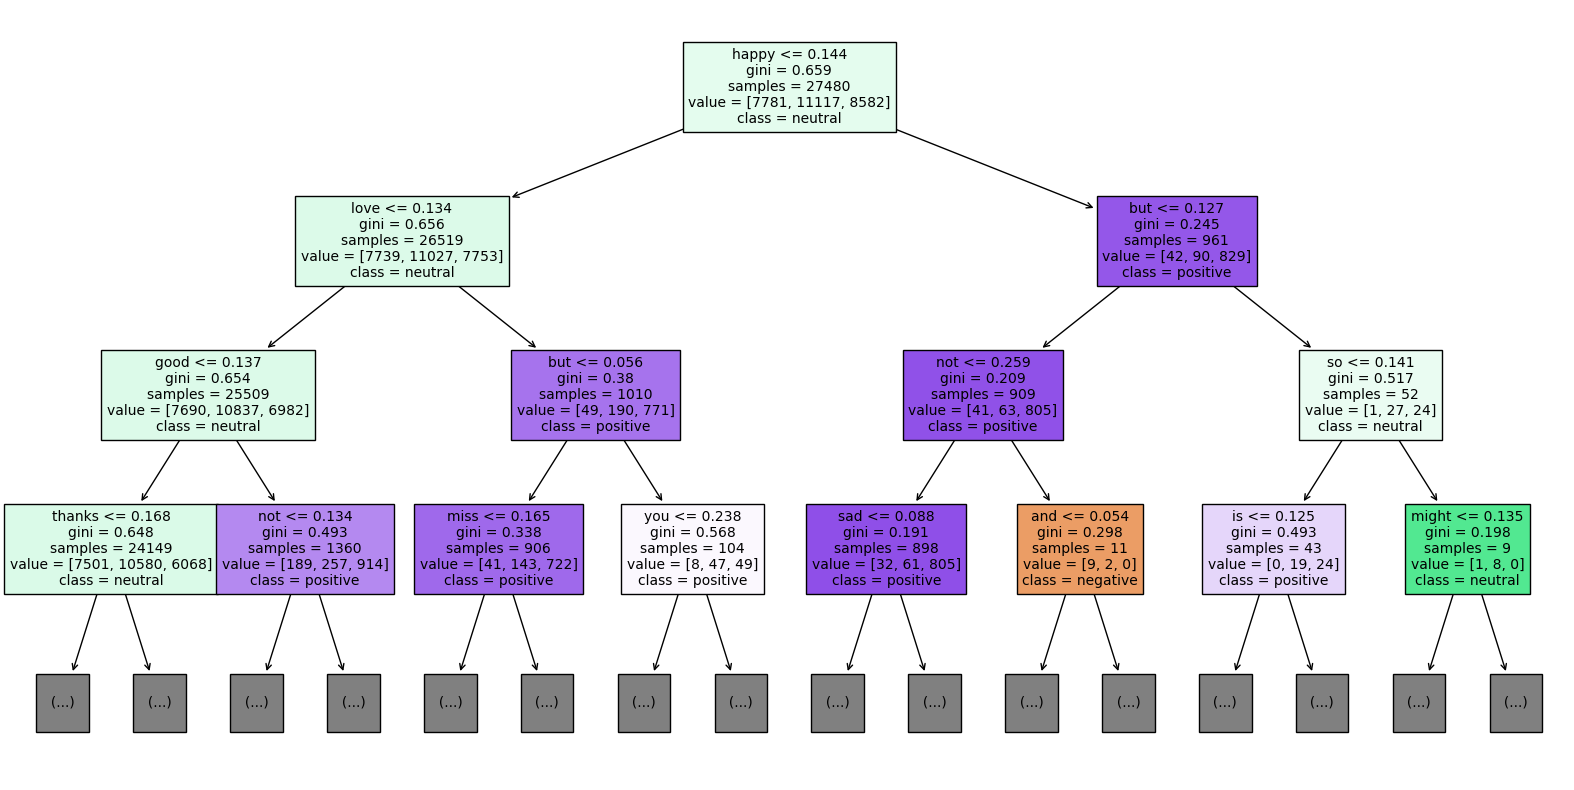

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(decision_tree_model, filled=True, feature_names=tfidf.get_feature_names_out(), class_names=decision_tree_model.classes_, max_depth=3, fontsize=10)
plt.show()


## Random Forest 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Reuse the TF-IDF features from the previous step
X_train_tfidf = tfidf.fit_transform(train_data['text'])
X_test_tfidf = tfidf.transform(test_data['text'])

# Step 2: Define the labels (sentiment) for training
y_train = train_data['sentiment']

# Step 3: Train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

# Step 4: Predict on the test set
y_test_pred_rf = random_forest_model.predict(X_test_tfidf)

# Step 5: Evaluate the model
accuracy_rf = accuracy_score(test_data['sentiment'], y_test_pred_rf)
accuracy_rf

# Step 6: Detailed classification report
report_rf = classification_report(test_data['sentiment'], y_test_pred_rf, output_dict=True)

# Convert the classification report into a DataFrame for better display
report_rf_df = pd.DataFrame(report_rf).transpose()
report_rf_df

,precision,recall,f1-score,support
negative,0.733850,0.567433,0.640000,1001.000000
neutral,0.614438,0.767832,0.682624,1430.000000
positive,0.790339,0.697189,0.740848,1103.000000
accuracy,0.689021,0.689021,0.689021,0.689021
macro avg,0.712876,0.677485,0.687824,3534.000000
weighted avg,0.703162,0.689021,0.688723,3534.000000


In [13]:
accuracy_rf

0.6890209394453877

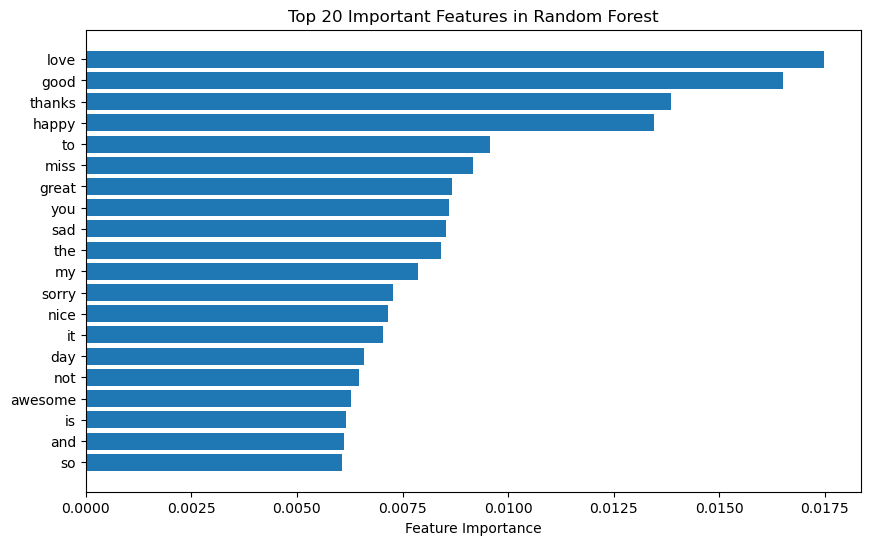

In [14]:
# Visualize the feature importance (top 20 features)
import numpy as np

# Get feature importance from the model
feature_importance = random_forest_model.feature_importances_

# Sort feature importance values and select the top 20 features
indices = np.argsort(feature_importance)[-20:]

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), tfidf.get_feature_names_out()[indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features in Random Forest')
plt.show()


## XGBoost

In [16]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Reuse the TF-IDF features from the previous step
X_train_tfidf = tfidf.fit_transform(train_data['text'])
X_test_tfidf = tfidf.transform(test_data['text'])

# Step 2: Encode the sentiment labels (y_train and y_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data['sentiment'])
y_test_encoded = label_encoder.transform(test_data['sentiment'])

# Step 3: Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Step 4: Predict on the test set
y_test_pred_xgb = xgb_model.predict(X_test_tfidf)

# Step 5: Evaluate the model
accuracy_xgb = accuracy_score(y_test_encoded, y_test_pred_xgb)
accuracy_xgb

# Step 6: Detailed classification report
report_xgb = classification_report(y_test_encoded, y_test_pred_xgb, target_names=label_encoder.classes_, output_dict=True)

# Convert the classification report into a DataFrame for better display
report_xgb_df = pd.DataFrame(report_xgb).transpose()
report_xgb_df


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:59:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,precision,recall,f1-score,support
negative,0.745098,0.531469,0.620408,1001.000000
neutral,0.606283,0.809790,0.693413,1430.000000
positive,0.823077,0.679057,0.744163,1103.000000
accuracy,0.690153,0.690153,0.690153,0.690153
macro avg,0.724819,0.673439,0.685995,3534.000000
weighted avg,0.713266,0.690153,0.688574,3534.000000


In [17]:
accuracy_xgb

0.6901528013582343

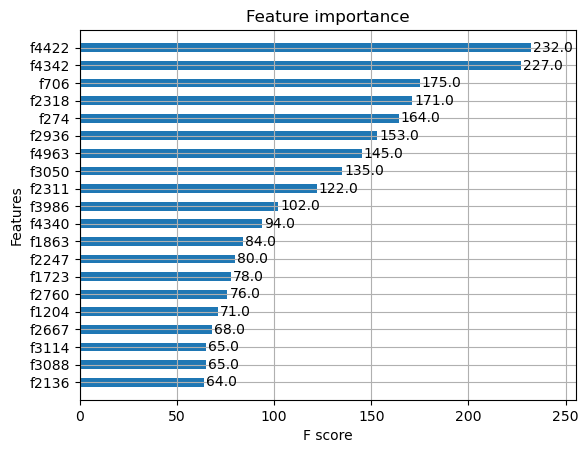

In [18]:
# Optional: Visualize the feature importance
xgb.plot_importance(xgb_model, max_num_features=20, height=0.5)
plt.show()

## Emotion Detection from Text

In [19]:
import pandas as pd

# Load the dataset (adjust the path accordingly)
data_path = r'C:\Users\71591\Desktop\dataset\tweet_emotions.csv'

# Load the dataset
emotion_data = pd.read_csv(data_path)

# Visualize the first few rows of the dataset
emotion_data.head()

# Get basic information about the dataset (including null values)
emotion_data.info()

# Check for null values
emotion_data.isnull().sum()

# Describe the dataset to get summary statistics (if applicable)
emotion_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


,tweet_id,sentiment,content
count,4.000000e+04,40000,40000
unique,NaN,13,39827
top,NaN,neutral,I just received a mothers day card from my lov...
freq,NaN,8638,14
mean,1.845184e+09,NaN,NaN
std,1.188579e+08,NaN,NaN
min,1.693956e+09,NaN,NaN
25%,1.751431e+09,NaN,NaN
50%,1.855443e+09,NaN,NaN
75%,1.962781e+09,NaN,NaN


## SVM 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert the text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(emotion_data['content'])

# Step 2: Encode the sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(emotion_data['sentiment'])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Step 4: Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Step 6: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

# Step 7: Detailed classification report
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, output_dict=True)

# Convert the classification report into a DataFrame for better display
report_svm_df = pd.DataFrame(report_svm).transpose()
report_svm_df

C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
anger,0.000000,0.000000,0.000000,19.000
boredom,0.000000,0.000000,0.000000,31.000
empty,0.000000,0.000000,0.000000,162.000
enthusiasm,0.000000,0.000000,0.000000,163.000
fun,0.000000,0.000000,0.000000,338.000
happiness,0.347996,0.346304,0.347148,1028.000
hate,0.459770,0.149254,0.225352,268.000
love,0.524954,0.372703,0.435917,762.000
neutral,0.327954,0.583908,0.420008,1740.000
relief,0.454545,0.014205,0.027548,352.000


In [24]:
# Apply class weighting to handle imbalance
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model again
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

# Detailed classification report
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
report_svm_df


,precision,recall,f1-score,support
anger,0.000000,0.000000,0.000000,19.000000
boredom,0.000000,0.000000,0.000000,31.000000
empty,0.035294,0.018519,0.024291,162.000000
enthusiasm,0.000000,0.000000,0.000000,163.000000
fun,0.122449,0.159763,0.138639,338.000000
happiness,0.336946,0.332685,0.334802,1028.000000
hate,0.328125,0.313433,0.320611,268.000000
love,0.473438,0.397638,0.432240,762.000000
neutral,0.356612,0.413793,0.383081,1740.000000
relief,0.184669,0.150568,0.165884,352.000000


In [25]:
accuracy_svm

0.317625

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Step 3: Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

# Step 4: Detailed classification report
report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()
report_dt_df


,precision,recall,f1-score,support
anger,0.000000,0.000000,0.000000,19.0000
boredom,0.000000,0.000000,0.000000,31.0000
empty,0.016667,0.012346,0.014184,162.0000
enthusiasm,0.000000,0.000000,0.000000,163.0000
fun,0.071942,0.059172,0.064935,338.0000
happiness,0.257561,0.256809,0.257185,1028.0000
hate,0.152542,0.134328,0.142857,268.0000
love,0.304408,0.290026,0.297043,762.0000
neutral,0.304831,0.362644,0.331234,1740.0000
relief,0.108597,0.068182,0.083770,352.0000


In [27]:
accuracy_dt

0.2465

## Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Step 3: Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

# Step 4: Detailed classification report
report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_, output_dict=True)

# Convert the classification report into a DataFrame for better display
report_rf_df = pd.DataFrame(report_rf).transpose()
report_rf_df


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
anger,0.000000,0.000000,0.000000,19.00000
boredom,0.000000,0.000000,0.000000,31.00000
empty,0.000000,0.000000,0.000000,162.00000
enthusiasm,0.000000,0.000000,0.000000,163.00000
fun,0.060606,0.005917,0.010782,338.00000
happiness,0.344717,0.314202,0.328753,1028.00000
hate,0.382353,0.145522,0.210811,268.00000
love,0.456452,0.371391,0.409551,762.00000
neutral,0.325114,0.530460,0.403145,1740.00000
relief,0.230769,0.017045,0.031746,352.00000


In [29]:
accuracy_rf

0.33025

## XGBoost

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Step 3: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

# Step 4: Detailed classification report
report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_, output_dict=True)

# Convert the classification report into a DataFrame for better display
report_xgb_df = pd.DataFrame(report_xgb).transpose()
report_xgb_df


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

,precision,recall,f1-score,support
anger,0.000000,0.000000,0.000000,19.00000
boredom,0.000000,0.000000,0.000000,31.00000
empty,0.000000,0.000000,0.000000,162.00000
enthusiasm,0.000000,0.000000,0.000000,163.00000
fun,0.092105,0.020710,0.033816,338.00000
happiness,0.343612,0.303502,0.322314,1028.00000
hate,0.359477,0.205224,0.261283,268.00000
love,0.474295,0.375328,0.419048,762.00000
neutral,0.340314,0.635057,0.443152,1740.00000
relief,0.292683,0.034091,0.061069,352.00000


In [31]:
accuracy_xgb

0.34675